In [99]:
from __future__ import print_function, division
import numpy as np
import pylab as pl
import seaborn
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit, minimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [100]:
distribution = ['chisq', 'poisson', 'binomial', 'normal', 'laplace']
#distributions = ['chisq']

In [101]:
allmean = 150

In [102]:
degf = allmean

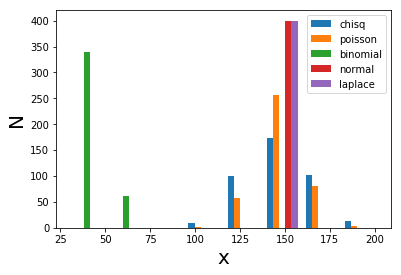

In [103]:
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(degf, size=400)
md['poisson'] = np.random.poisson(degf, size=400)
md['binomial'] = np.random.binomial(degf, 0.3, size=400)
md['normal'] = np.random.normal(degf, 1, size=400)
md['laplace'] = np.random.laplace(degf, 1, size=400)
#bins = np.linspace(30, 40)
# md now is a dictionary with objects: arrays by the keys 'chisq', 'poisson', 'binomial', 'normal', 'laplace'
pl.hist([md['chisq'], md['poisson'], md['binomial'], md['normal'], md['laplace']], bins = 8, label=['chisq', 'poisson', 'binomial', 'normal', 'laplace'])
pl.ylabel('N', fontsize=20)
pl.xlabel('x', fontsize=20)
pl.legend(loc='upper right')
pl.show()

Figure 1: Chi sq distribution: df = 150, N=500

In [104]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['poisson'].mean(), md['poisson'].std()))
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['normal'].mean(), md['normal'].std()))
print ("Laplace mean: %.2f, standard deviation: %.2f"%(md['laplace'].mean(), md['laplace'].std()))

Chisq mean: 149.38, standard deviation: 17.59
Poisson mean: 150.01, standard deviation: 12.16
Binomial mean: 45.02, standard deviation: 5.61
Normal mean: 149.94, standard deviation: 0.94
Laplace mean: 149.96, standard deviation: 1.35


In [105]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142
  133  125  117  111  105  100   95   90   86   83   80   76   74   71
   68   66   64   62   60   58   57   55   54   52   51   50   48   47
   46   45   44   43   42   41   40   40   39   38   37   37   36   35
   35   34   33   33   32   32   31   31   30   30   29   29   28   28
   28   27   27   27   26   26   25   25   25   25   24   24   24   23
   23   23   22   22   22   22   21   21   21   21   21   20   20   20
   20] (99,)


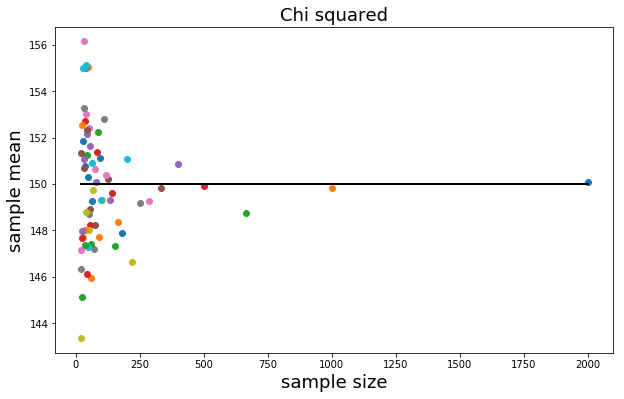

In [106]:
md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(degf, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [degf, degf], 'k')

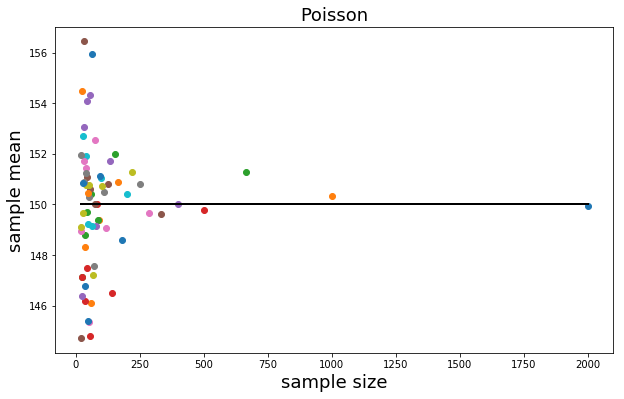

In [107]:
md['poisson'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['poisson'][n] = np.random.chisquare(degf, size = n)
    
# save the means for plotting later    

md['poisson']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [degf, degf], 'k')

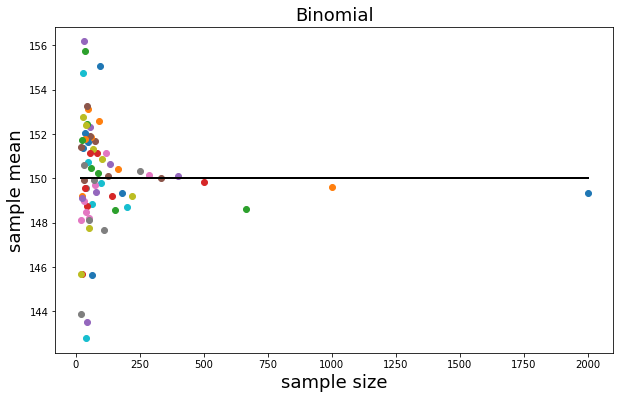

In [108]:
md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['binomial'][n] = np.random.chisquare(degf, size = n)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [degf, degf], 'k')

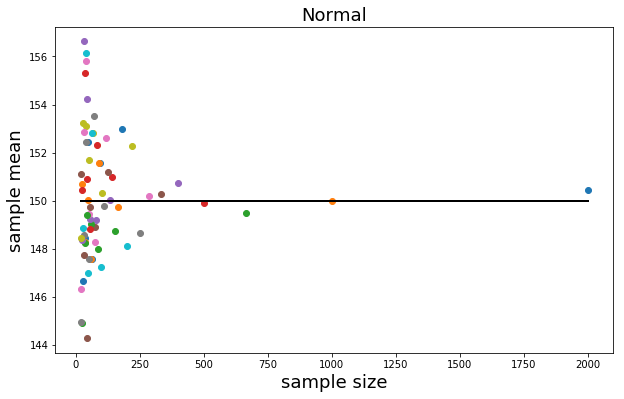

In [109]:
md['normal'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['normal'][n] = np.random.chisquare(degf, size = n)
    
# save the means for plotting later    

md['normal']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [degf, degf], 'k')

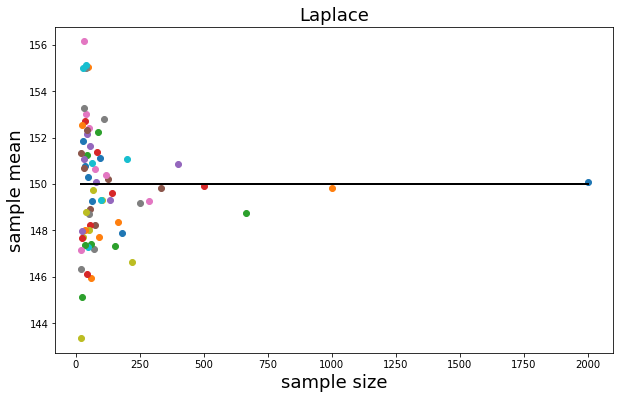

In [110]:
md['laplace'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['laplace'][n] = np.random.chisquare(degf, size = n)
    
# save the means for plotting later    

md['laplace']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['laplace']:
    if not type(nn) == str:
        md['laplace']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['laplace']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Laplace', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [degf, degf], 'k')

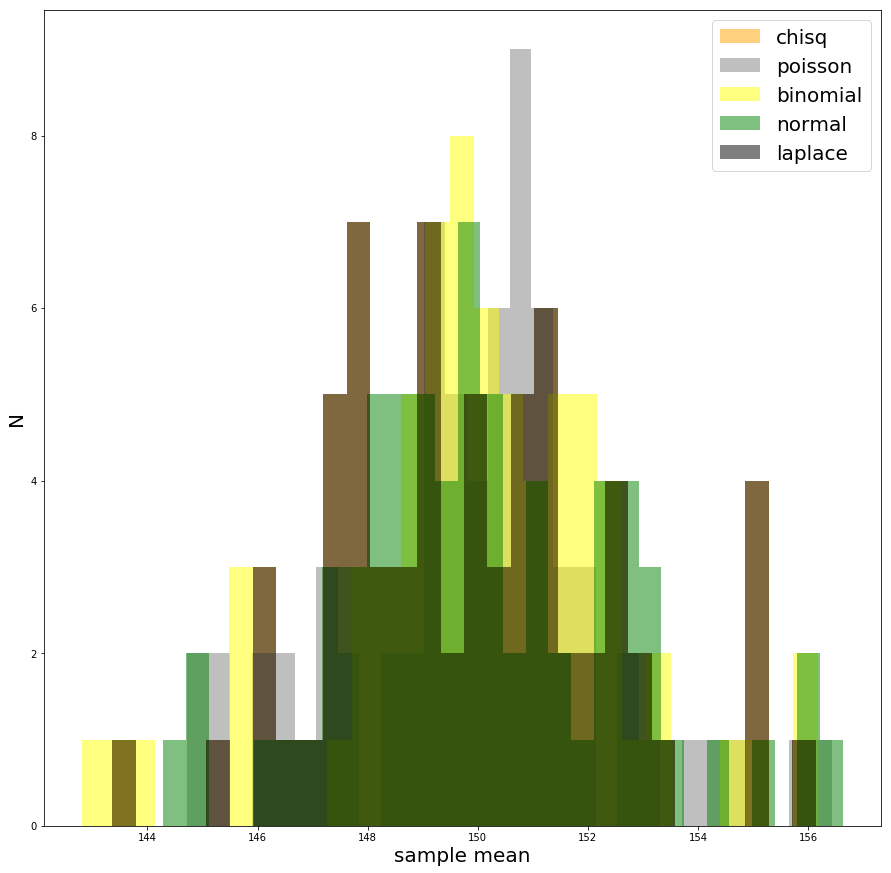

In [111]:
mchi = list(md['chisq']['means'].values())
mpois = list(md['poisson']['means'].values())
mbin = list(md['binomial']['means'].values())
mnor = list(md['normal']['means'].values())
mlap = list(md['laplace']['means'].values())

plt.figure(figsize=(15, 15))
plt.hist(mchi, bins = 30, alpha=0.5, label='chisq', color='orange')
plt.hist(mpois, bins = 30, alpha=0.5, label='poisson', color='gray')
plt.hist(mbin, bins = 30, alpha=0.5, label='binomial', color='yellow')
plt.hist(mnor, bins = 30, alpha=0.5, label='normal', color='green')
plt.hist(mlap, bins =30, alpha=0.5, label='laplace', color='black')
plt.xlabel('sample mean', fontsize = 20)
plt.ylabel('N', fontsize = 20)
plt.legend(loc='upper right', fontsize = 20)
plt.show()

In [129]:
joinedlist = mchi

In [130]:
joinedlist = list(set(joinedlist + mbin))

In [131]:
joinedlist = list(set(joinedlist + mnor))

In [132]:
joinedlist = list(set(joinedlist + mlap))

In [133]:
joinedlist = list(set(joinedlist + mpois))

In [134]:
avg = np.mean(joinedlist)
var = np.var(joinedlist)

In [136]:
print(var)

6.252952447725632


In [137]:
pdf_x = np.linspace(np.min(joinedlist),np.max(joinedlist),100)
pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)

C:\Users\Sheba\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sheba\Anaconda3\lib\site-packages\matplotlib\legend.py:938: UserWarning: Legend does not support 'Fit' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\Sheba\Anaconda3\lib\site-packages\matplotlib\legend.py:938: UserWarning: Legend does not support 'Data' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


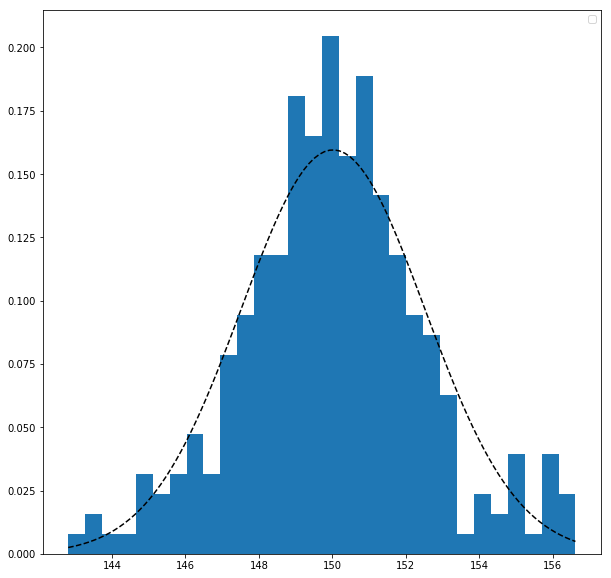

In [138]:
plt.figure(figsize=(10, 10))
plt.hist(joinedlist,30,normed=True)
plt.plot(pdf_x,pdf_y,'k--')
plt.legend(("Fit","Data"),"best")
plt.show()